# Notes to self:


In [ ]:
# Setup
import librosa
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from luis_data_prep.NoiseGate import NoiseGate

def firstNSeconds(wav_names, prefix, n):
    """Grabs the first ten seconds of the first wav file."""
    w = next(wav_names)
    path = os.path.join(prefix, w)
    sample, sampling_rate = librosa.load(path)
    segment = sample[:sampling_rate*n]
    return segment, sampling_rate

def firstSeconds(n):
    return lambda x, y: firstNSeconds(x, y, n)

def firstSample(wav_names, prefix):
    """Grabs all of the first sample."""
    w = next(wav_names)
    path = os.path.join(prefix, w)
    return librosa.load(path)

def clampSignal(segment):
    energy = NoiseGate.short_term_energy(segment, 100)
    mean_e = np.average(energy)
    stddev_e = np.std(energy)
    return NoiseGate.clamp_below_threshold(segment, energy, mean_e, 100)

def passthrough(segment):
    return segment

notHidden = lambda x: not x.startswith('.')
def visualize(visFun, choiceFun=firstSeconds(1), preprocess=passthrough, data_dir='../data'):
    classes = filter(notHidden, os.listdir(data_dir)) 
    for c in classes:
        wavs = filter(notHidden, os.listdir(data_dir + '/' + c))
        segment, sampling_rate = choiceFun(wavs, os.path.join(data_dir, c))
        segment = preprocess(segment)
        visFun(c, segment, sampling_rate)


In [ ]:
def viewEnergy(label, segment, sr):
    energy = NoiseGate.short_term_energy(segment, 100)
    mean_e = np.average(energy)
    stddev_e = np.std(energy)
    fig = plt.figure()
    plt.plot(energy)
    plt.plot([0, len(energy)], [mean_e, mean_e])
    plt.plot([0, len(energy)], [mean_e + 2*stddev_e, mean_e + 2*stddev_e])
visualize(viewEnergy, firstSeconds(1))

In [ ]:
from IPython.display import Audio
from IPython.display import display

def playAudio(label, segment, sampling_rate):
    print(label)
    display(Audio(segment, rate=sampling_rate, autoplay=False))

visualize(playAudio)

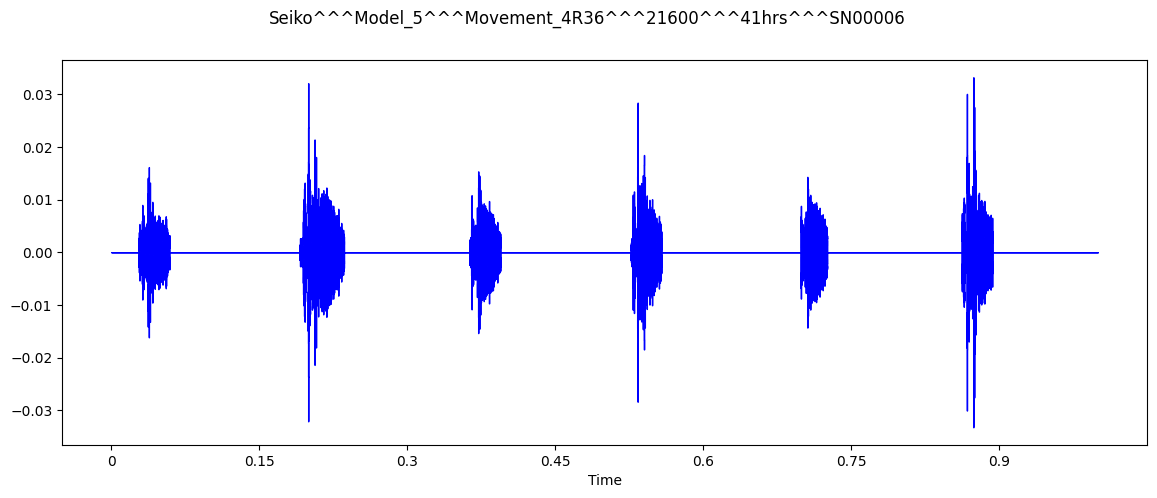

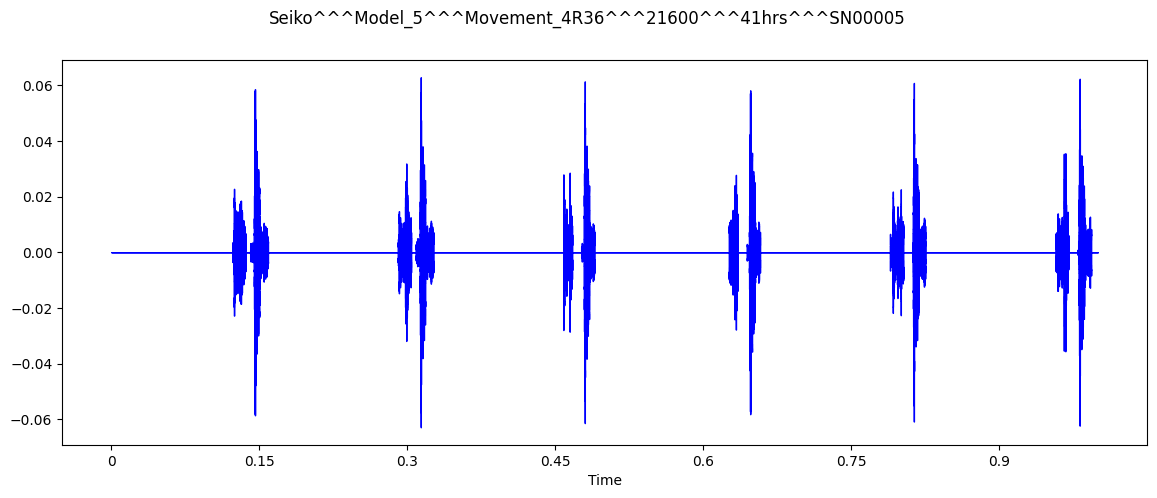

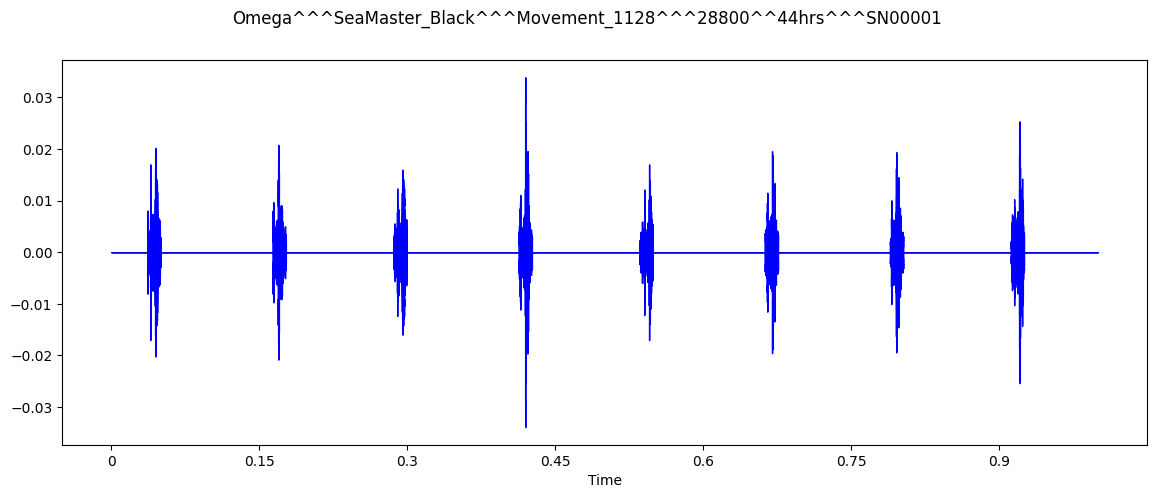

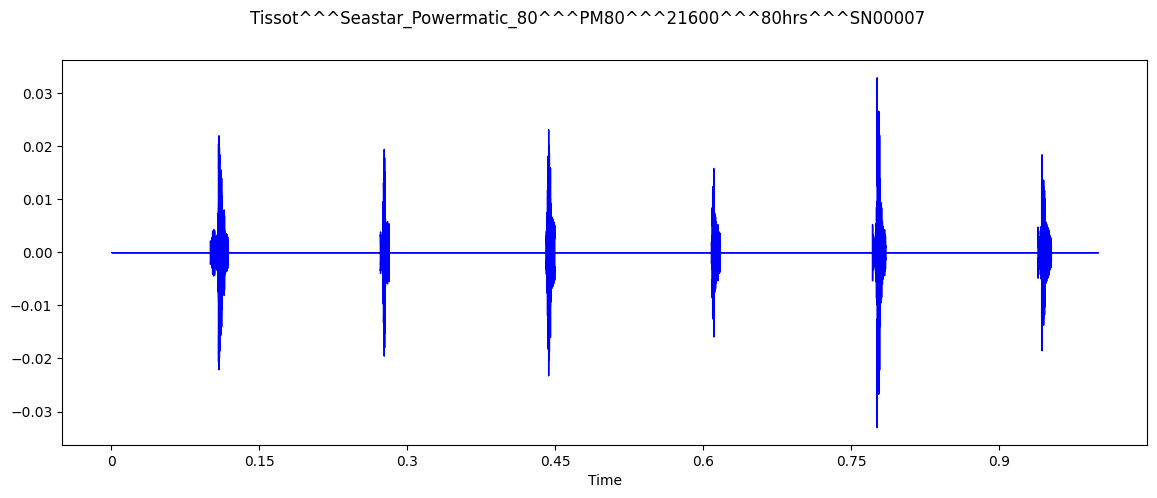

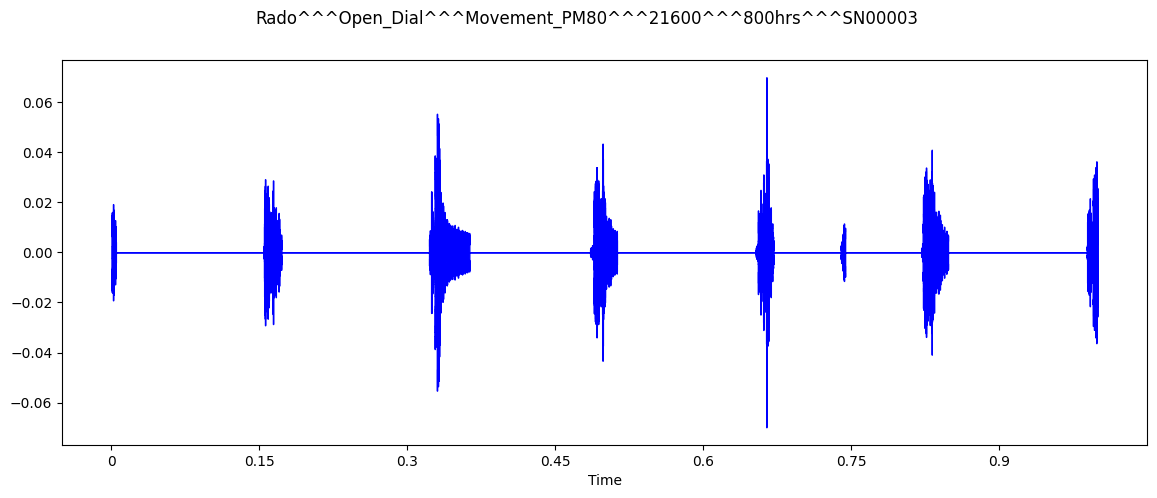

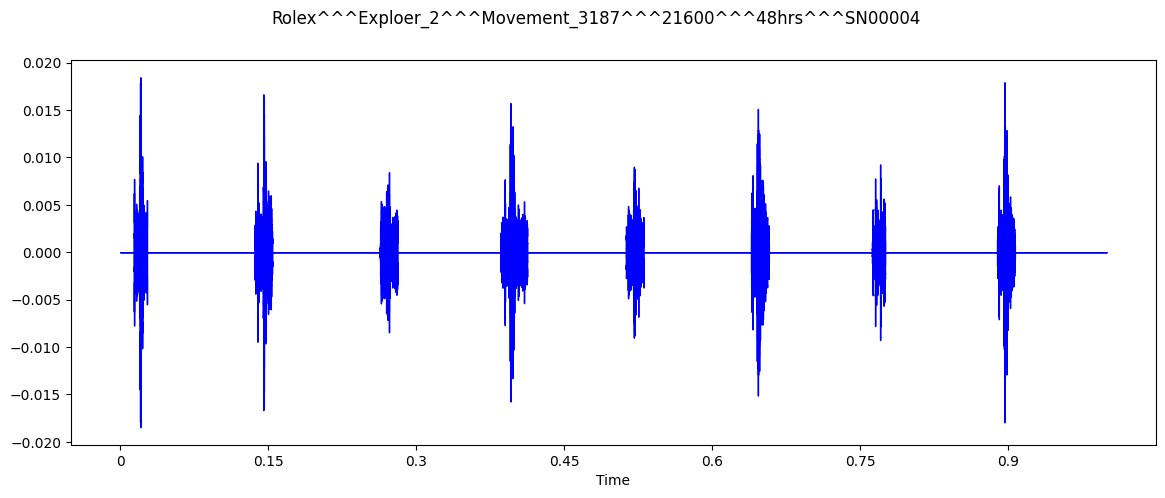

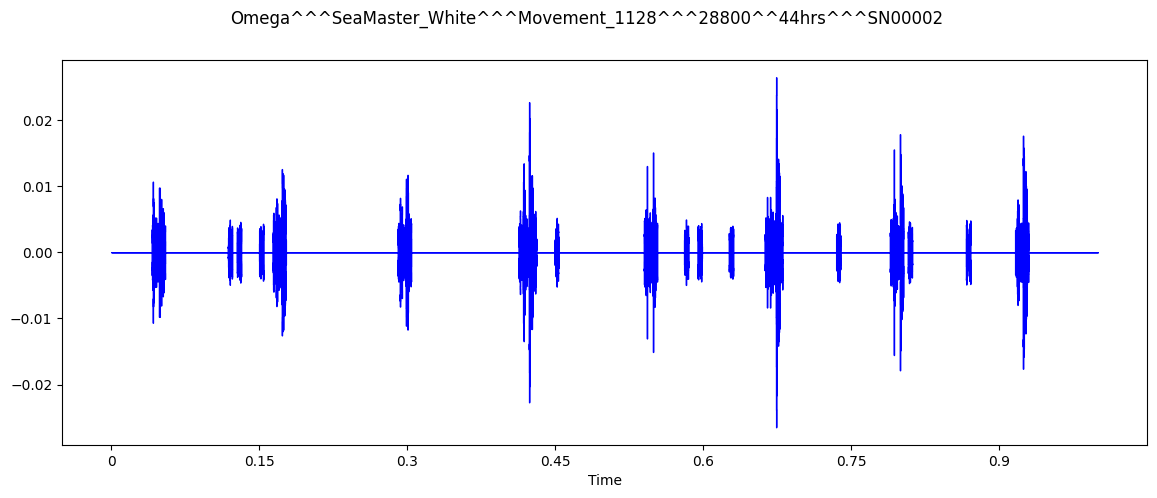

In [207]:
def plotAmplitude(label, segment, sampling_rate):
    fig = plt.figure(figsize=(14,5))
    librosa.display.waveshow(segment, sr=sampling_rate, color='blue')
    fig.suptitle(label)

visualize(plotAmplitude, firstSeconds(1), clampSignal)

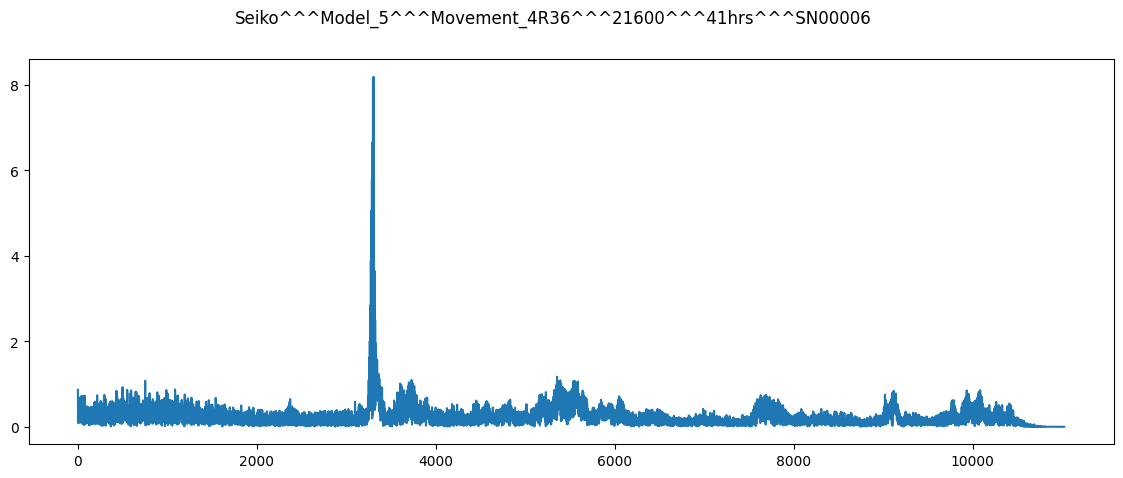

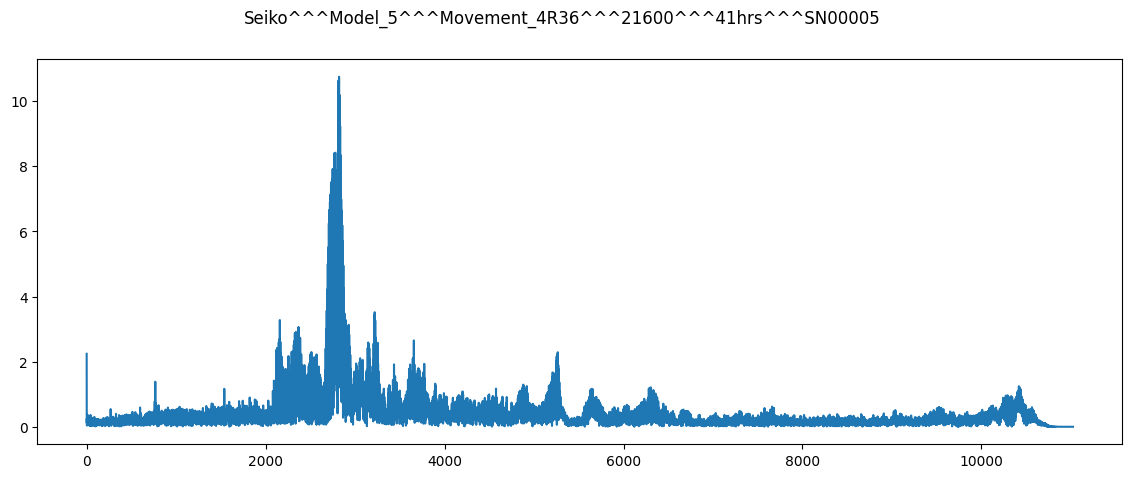

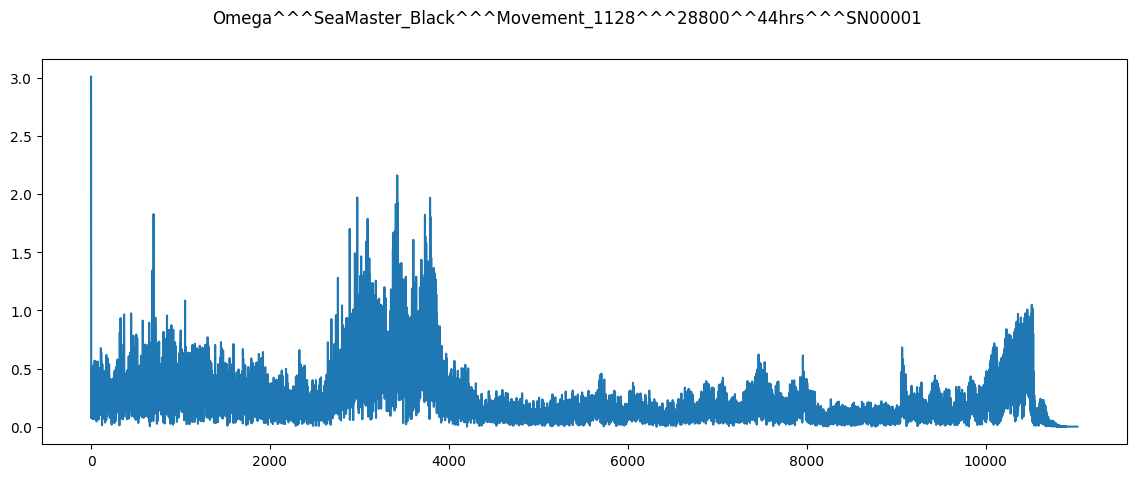

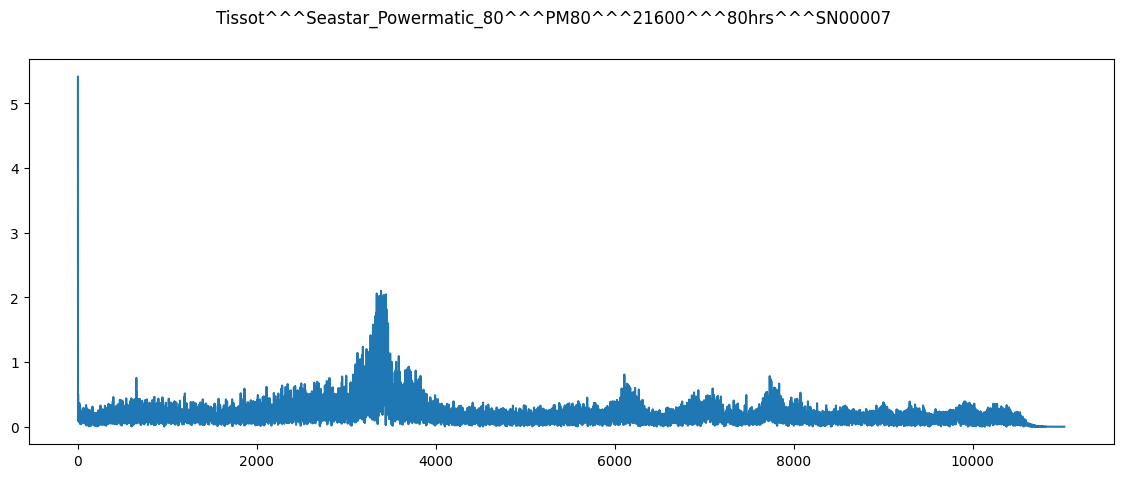

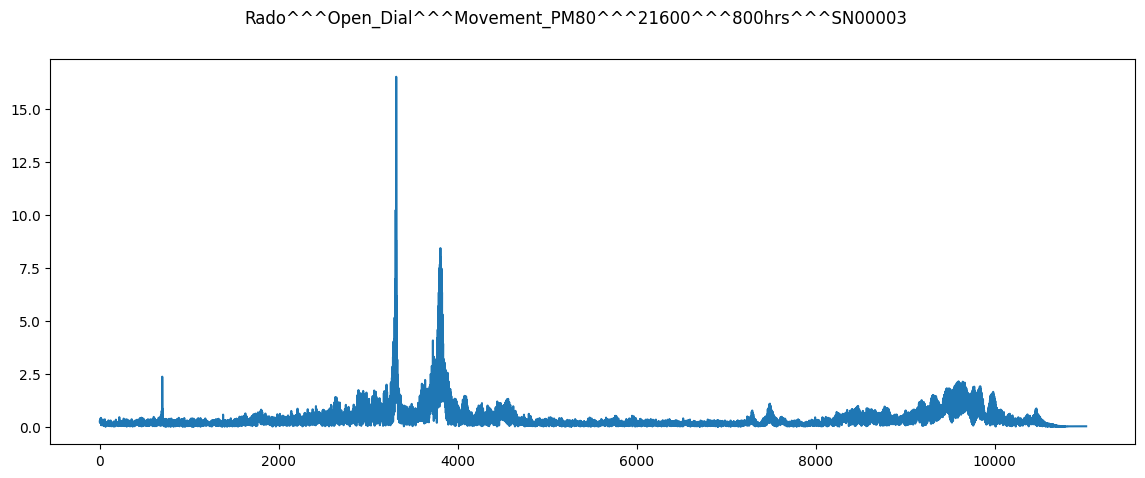

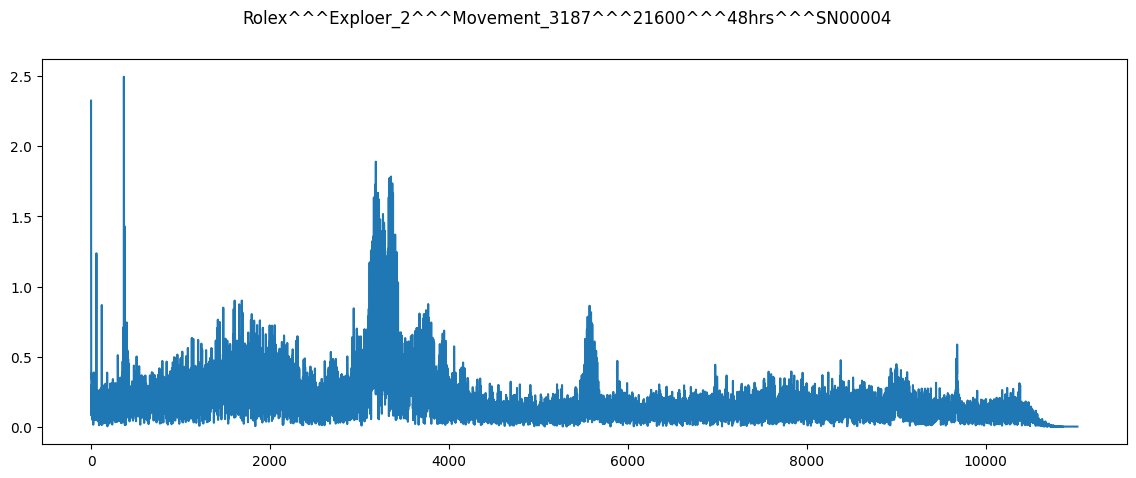

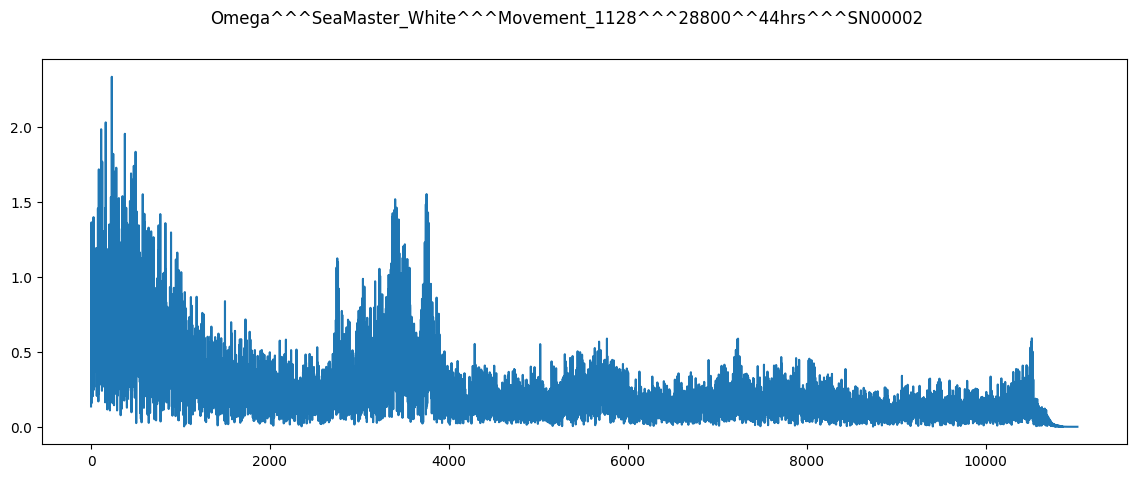

In [208]:
# Run basic FFT over the signal
from scipy.fft import fft, fftfreq

def viewFft(label, segment, sampling_rate):
    yf = fft(segment)
    xf = fftfreq(len(segment), 1/sampling_rate)

    fig = plt.figure(figsize=(14,5))
    plt.plot(xf[:len(segment)//2], np.abs(yf[:len(segment)//2]))
    fig.suptitle(label)

visualize(viewFft, firstSeconds(1))

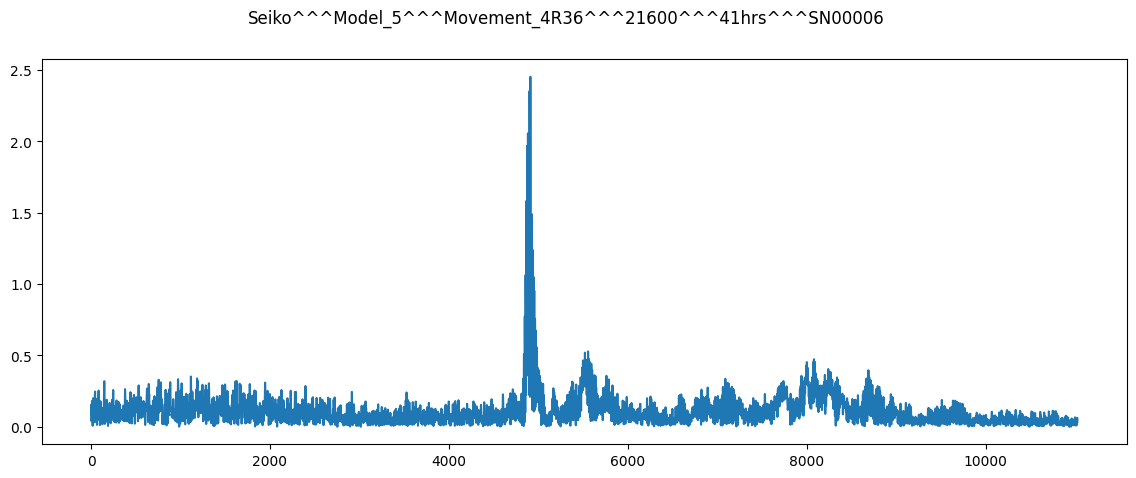

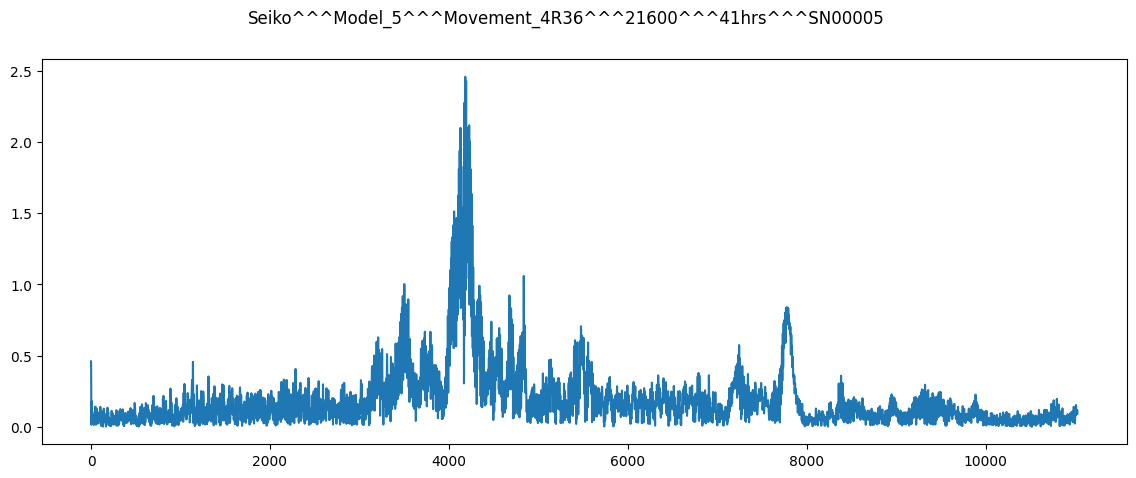

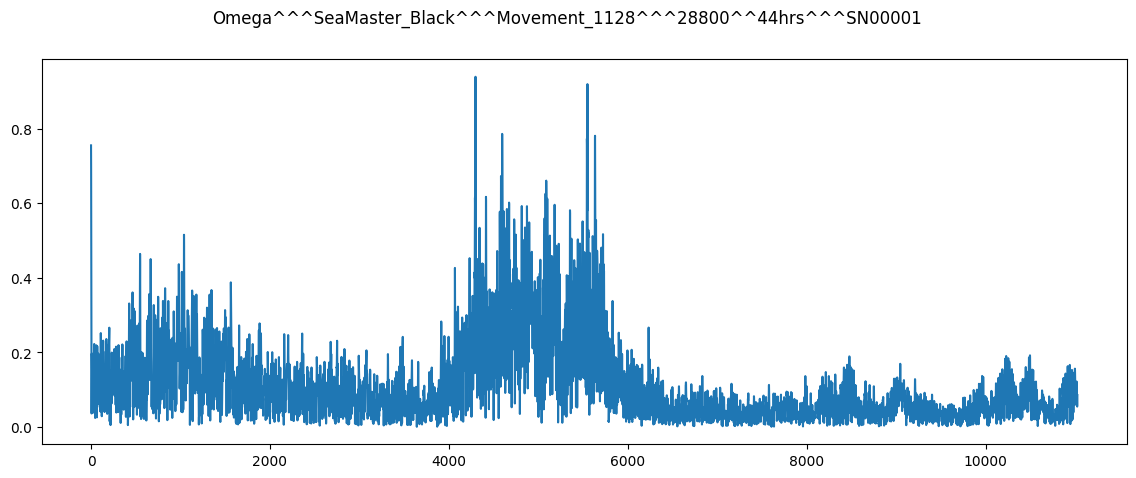

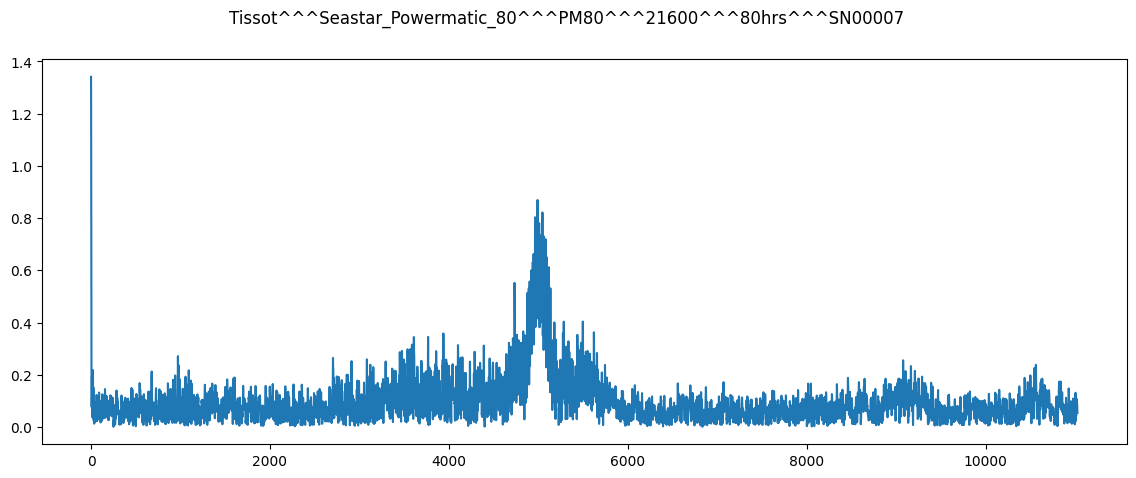

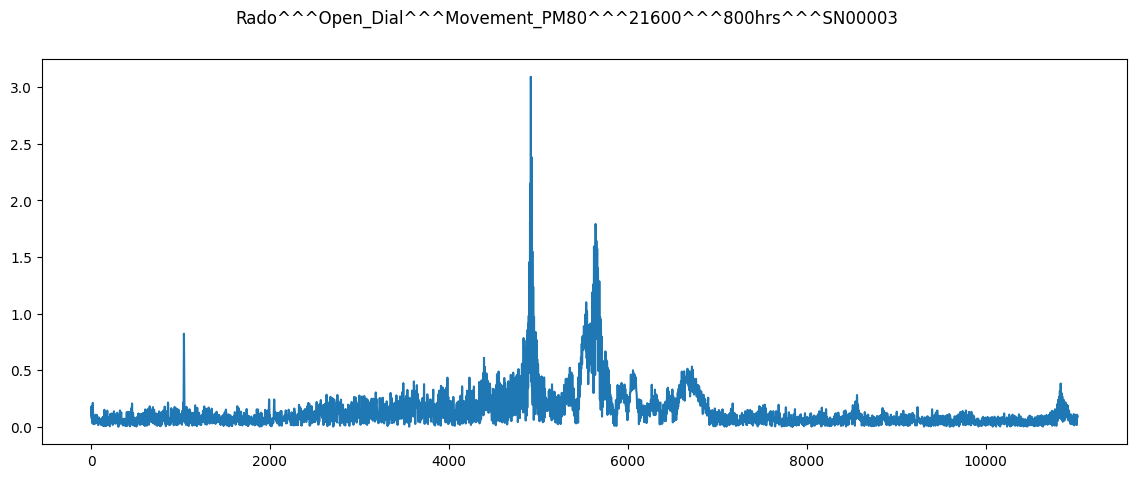

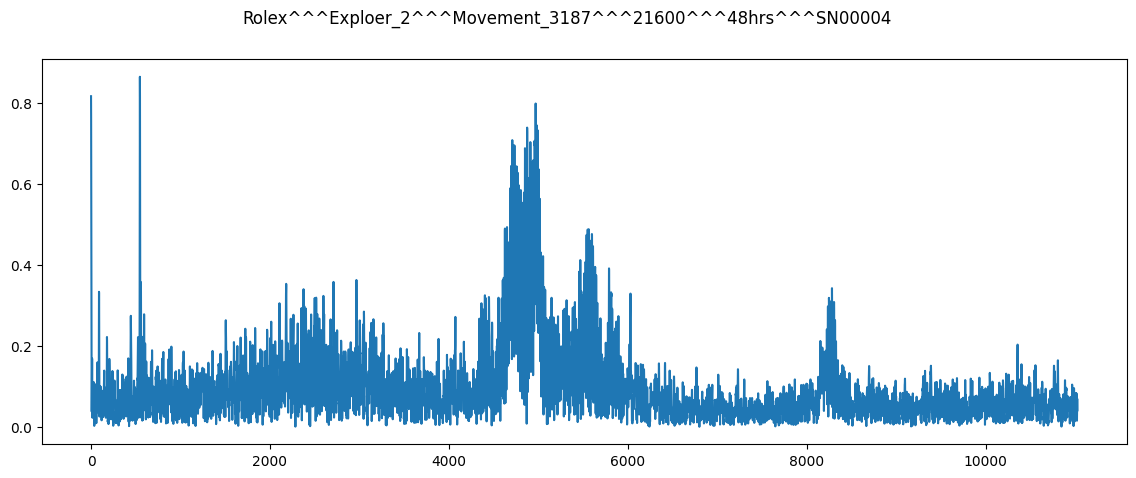

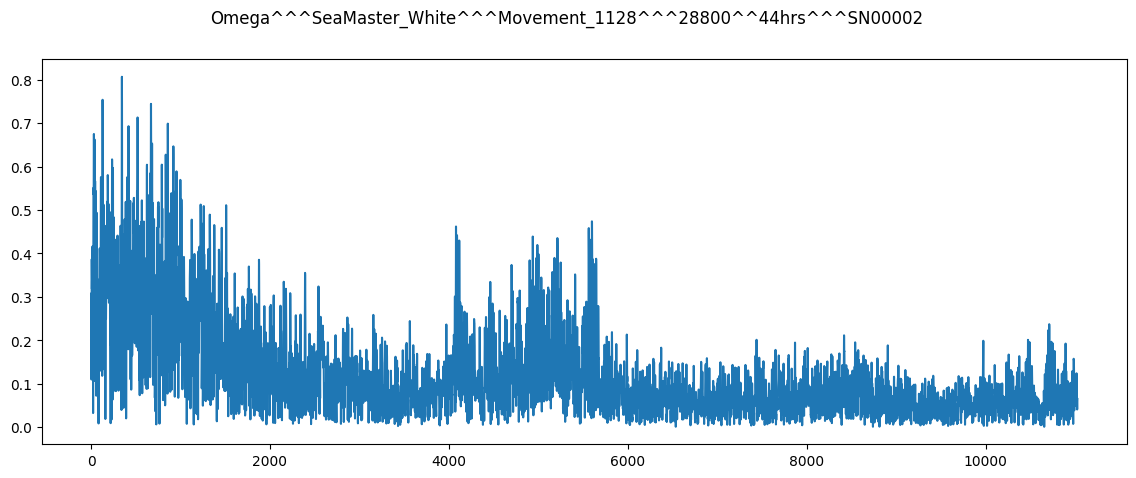

In [206]:
def viewSpectrogram(label, segment, sampling_rate):
    sgram = librosa.stft(segment, n_fft=32768, win_length=22050, hop_length=22050//2)
    sgram_db = librosa.power_to_db(np.abs(sgram), ref=np.max)
    fig = plt.figure(figsize=(14,5))
    librosa.display.specshow(sgram_db, x_axis='time')
    fig.suptitle(label)

visualize(viewSpectrogram, choiceFun=firstSeconds(20))

In [ ]:
def viewMelSpectrogram(label, segment, sampling_rate):
    sgram = librosa.stft(segment, n_fft=2048)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sampling_rate)
    mel_sgram = librosa.power_to_db(mel_sgram, ref=np.max)

    fig = plt.figure(figsize=(14,5))
    librosa.display.specshow(mel_sgram, x_axis='time', y_axis='mel')
    fig.suptitle(label)

visualize(viewMelSpectrogram, choiceFun=firstSeconds(1))

In [ ]:
visualize(viewMelSpectrogram, choiceFun=firstSample)

In [ ]:
# MFCCs
def viewMfcc(label, segment, sampling_rate):
    mfcc = librosa.feature.mfcc(y=segment, sr=sampling_rate)
    fig = plt.figure(figsize=(14,5))
    librosa.display.specshow(mfcc, x_axis='time')
    fig.suptitle(label)

visualize(viewMfcc, choiceFun=firstSeconds(1))